In [4]:
import vtk
from vtk_for_rays import vtk_show, vtk_addpoints, stl_io

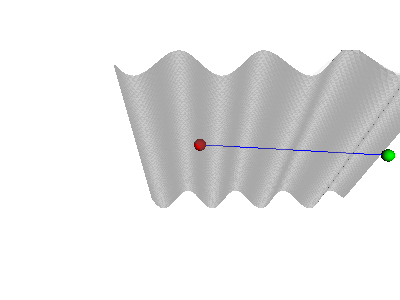

In [6]:
mesh = stl_io.loadSTL("../data_files/sine_wave.stl")

mapper = vtk.vtkPolyDataMapper()
mapper.SetInputData(mesh)

actor = vtk.vtkActor()
actor.SetMapper(mapper)
actor.GetProperty().SetOpacity(0.5)

renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(1.0, 1.0, 1.0)

camera = renderer.MakeCamera()
camera.SetPosition(0, 5, 3)
camera.SetFocalPoint(0, 0, 0)
camera.SetViewAngle(45.0)
camera.SetRoll(0)
renderer.SetActiveCamera(camera)

pSource = [0, 0.0, -.1]
pTarget = [3.0, 0.0, .1]

vtk_addpoints.addPoint(renderer, pSource, radius = .1, color=[1.0, 0.0, 0.0])
vtk_addpoints.addPoint(renderer, pTarget, radius = .1, color=[0.0, 1.0, 0.0])
vtk_addpoints.addLine(renderer, pSource, pTarget)

vtk_show.vtk_show(renderer)

In [7]:
obbTree = vtk.vtkOBBTree()
obbTree.SetDataSet(mesh)
obbTree.BuildLocator()

In [8]:
pointsVTKintersection = vtk.vtkPoints()
code = obbTree.IntersectWithLine(pSource, pTarget, pointsVTKintersection, None)
if code > 0:
    noPointsVTKIntersection = pointsVTKIntersectionData.GetNumberOfTuples()

In [9]:
pointsVTKIntersectionData = pointsVTKintersection.GetData()
pointsIntersection = []
for idx in range(noPointsVTKIntersection):
    _tup = pointsVTKIntersectionData.GetTuple3(idx)
    pointsIntersection.append(_tup)

In [10]:
print pointsIntersection

[(0.5515298247337341, 0.0, -0.06323134154081345), (0.9714393019676208, 0.0, -0.035237379372119904), (1.4998996257781982, 0.0, -6.6884831539937295e-06), (2.0287253856658936, 0.0, 0.03524835407733917), (2.4479081630706787, 0.0, 0.06319388747215271)]
